In [ ]:
# Copyright Elasticsearch B.V. and/or licensed to Elasticsearch B.V. under one
# or more contributor license agreements. Licensed under the Elastic License;
# you may not use this file except in compliance with the Elastic License.

# Scenario 1: Data summarization

1. Train model (M1) on the complete dataset (D1)

2. Generate a summarization dataset using some technique (D2)

3. Train a new model (M2) on D2
    1. Use the same best hyperparameters as for M1   
    2. **Identify a new set of best hyperparameters**
    
4. Compare M1 and M2
    1. Evaluation M1 and M2 on the complete dataset D1.
    2. Evaluate M1 and M2 on a grid and compute divergence
    3. Compare feature importance vectors for individual data points from M1 and M2 (should be very similar)
    4. Compare errors on the test dataset (D3)

**Notes:**
- We assume that generation of a summarization dataset is implemented. It can be written in Python for prototyping.
- 4 can be done with an inference pipeline and eland
- We need a simple way to query a model using inference pipeline (e.g. Python wrapper?)
- Evaluations can also be done with sklearn?
- What is the minimum amount of data we can get away with?


In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import json
import tempfile
import platform
import time
import string
import random

import pandas as pd
import numpy as np
import diversipy
import libtmux 

from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

import sys
sys.path.append('..')
from utils.misc import *

## 1. Train model (M1) on the complete dataset (D1)

In [2]:
dataset_name = 'facebook_6000'
D1 = pd.read_csv('../datasets/{}.csv'.format(dataset_name))
D1.drop_duplicates(inplace=True)

job1 = train(dataset_name, D1)

session: job_duajg	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpw36tk6mr --config /tmp/tmp_rp4t2vd --output /tmp/tmpoqwhrd94 --persist /tmp/tmprlxp5_av


In [3]:
job1.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpw36tk6mr --config /tmp/tmp_rp4t2vd --output /tmp/tmpoqwhrd94 --persist /tmp/tmprlxp5_av (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/evaluation_scenarios [feature/incremental-learning L|✚ 6…4⚑ 3] 12:59 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpw36tk6mr --config /tmp/tmp_rp4t2vd --output /tmp/tmpoqwhrd94 --persist /tmp/tmprlxp5_av 2021-04-21 10:59:03,276760 UTC [23584] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-04-21 10:59:03,276836 UTC [23584] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-04-21 10:59:03,276853 UTC [23584] DEBUG CSystemCallFilter_Linux.cc@128 Seccomp BPF filters available 2021-04-21 10:59:03,277683 UTC [23584] DEBUG CSystemCallFilter_Linux.cc@154 Seccomp BPF installed 2021-04-21 10:59:03,310552 UTC [23584] DEBUG CDataFrameAnalyzer.cc@104 Received 6000 rows 2021-04-21 11:00:46,071074 UTC [23584] INFO CBoostedTreeImpl.cc@240 Exiting hyperparameter optimisation loop early 2021-04-21 11:00:48,865185 UTC [23584] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":44908920} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":41530154} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":105440} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":255} ] 2021-04-21 11:00:48,865222 UTC [23584] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/evaluation_scenarios [feature/incremental-learning L|✚ 6…4⚑ 3] 13:00 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":8.999732971191407 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":0.140919104218482 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":0.501881897449493 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":4.251486301422119 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":0.005191836971789 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":6.201380729675293 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":0.224700644612312 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


 /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpw36tk6mr --config /tmp/tmp_rp4t2vd --output /tmp/tmpoqwhrd94 --persist /tmp/tmprlxp5_av
(env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/evaluation_scenarios [feature/incremental-learning L|✚ 6…4⚑ 3]
12:59 $  /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpw36tk6mr --config /tmp/tmp_rp4t2vd --output /tmp/tmpoqwhrd94 --persist /tmp/tmprlxp5_av
2021-04-21 10:59:03,276760 UTC [23584] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV
2021-04-21 10:59:03,276836 UTC [23584] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj
2021-04-21 10:59:03,276853 UTC [23584] DEBUG CSystemCallFilter_Linux.cc@128 Seccom

True

## 2. Generate a sumarization dataset

In [4]:
sampling_method = 'random'
D2 = summarize(dataset_name=dataset_name, dataset=D1,
              size=0.25, model_definition=job1.get_model_definition(), 
              method=sampling_method, verbose=False, 
              dependent_variable=job1.dependent_variable)

## 3. A. Train a new model with the same best best hyperparameters

In [5]:
# TODO I need to inject hyperparameters here
job2 = train(dataset_name, D2)
job2.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpm_kat7j5 --config /tmp/tmpfid63qs_ --output /tmp/tmpspypjc8c --persist /tmp/tmpwsdubizi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/evaluation_scenarios [feature/incremental-learning L|✚ 6…4⚑ 3] 13:04 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpm_kat7j5 --config /tmp/tmpfid63qs_ --output /tmp/tmpspypjc8c --persist /tmp/tmpwsdubizi 2021-04-21 11:04:22,377843 UTC [16324] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-04-21 11:04:22,377923 UTC [16324] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-04-21 11:04:22,377936 UTC [16324] DEBUG CSystemCallFilter_Linux.cc@128 Seccomp BPF filters available 2021-04-21 11:04:22,379466 UTC [16324] DEBUG CSystemCallFilter_Linux.cc@154 Seccomp BPF installed 2021-04-21 11:04:22,387888 UTC [16324] DEBUG CDataFrameAnalyzer.cc@104 Received 1500 rows 2021-04-21 11:05:00,028969 UTC [16324] INFO CBoostedTreeImpl.cc@240 Exiting hyperparameter optimisation loop early 2021-04-21 11:05:00,290295 UTC [16324] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":25849781} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":7919095} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":37789} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":86} ] 2021-04-21 11:05:00,290330 UTC [16324] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/evaluation_scenarios [feature/incremental-learning L|✚ 6…4⚑ 3] 13:05 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":124.1134567260742 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":1.505854725837707 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":2.995656013488769 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":12.00612449645996 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":1.447953820228576 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":14.12492275238037 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""54_prediction"":0.421843171119689 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


 /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpm_kat7j5 --config /tmp/tmpfid63qs_ --output /tmp/tmpspypjc8c --persist /tmp/tmpwsdubizi
(env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/evaluation_scenarios [feature/incremental-learning L|✚ 6…4⚑ 3]
13:04 $  /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpm_kat7j5 --config /tmp/tmpfid63qs_ --output /tmp/tmpspypjc8c --persist /tmp/tmpwsdubizi
2021-04-21 11:04:22,377843 UTC [16324] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV
2021-04-21 11:04:22,377923 UTC [16324] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj
2021-04-21 11:04:22,377936 UTC [16324] DEBUG CSystemCallFilter_Linux.cc@128 Seccom

True

## 3. B. Train a new model with new best hyperparameters

In [14]:
job2 = train(dataset_name, D2)
job2.wait_to_complete()

session: job_xbmzv	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpteocz31h --config /tmp/tmp2od10o5o --output /tmp/tmp6q1fs68x --persist model2.json


## 4. A. Compare M1 and M2 on D1

In [7]:
y_true = D1[job1.dependent_variable]
y_M1 = job1.get_predictions()
eval_job = evaluate(dataset_name=dataset_name,
                            dataset=D1, model=job2.model, verbose=False)
success = eval_job.wait_to_complete()
if not success:
    print('Evaluation failed')
y_M2 = eval_job.get_predictions()

In [8]:
def compute_metrics(ytrue, m1pred, m2pred):
    m1_mae = mean_absolute_error(ytrue, m1pred)
    m1_mse = mean_squared_error(ytrue, m1pred)
    m2_mae = mean_absolute_error(ytrue, m2pred)
    m2_mse = mean_squared_error(ytrue, m2pred)
    print("M1: MAE: {}\tMSE:{}".format(m1_mae, m1_mse))
    print("M2: MAE: {}\tMSE:{}".format(m2_mae, m2_mse))
    ax = sns.scatterplot(x=m1pred, y=m2pred)
    plt.xlabel('M1 predictions')
    plt.ylabel('M2 predictions')

M1: MAE: 2.9948999743493427	MSE:81.21282728062585
M2: MAE: 4.747365797487398	MSE:468.8721068394406


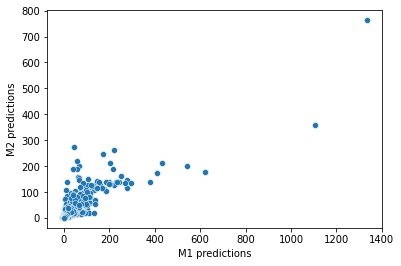

In [9]:
compute_metrics(y_true, y_M1, y_M2)